___

<a href='https://iitu.edu.kz/ru/'><img src='iitu.jpg'/></a>
___

# Our graduation topic is in three languages

### EN
**Creating a system that creates an ontology of scientific data with a heterogeneous structure.**

### RU 
 ***Создание системы, создающей онтологию научных данных с гетерогенной структурой.***
 
### KZ
***Гетерогенді құрылымы бар ғылыми деректердің онтологиясын құратын жүйе жасау***

## Diploma project EDA(Exploratory data analysis) system

**The essence of our project is to create our ontology and and send it to the database. In this project we are filtering on our knowledge base and converting it into a readable view.**


# Contents 
* [Create a csv file](#create_csv_file)
* [Create a dataframe without a value](#create_null_data)
* [Create a dataframe with a value](#create_with_value)
* [Read our ontology](#create_out_onto)
* [Sending a DataFrame to a database](#send_db)
* [Visualization](#Visualization)


In [1]:
import pandas as pd
import numpy as np
from owlready2 import *
import csv
import psycopg2
# from owlready2 import get_ontology, DataPropertyClass, ObjectPropertyClas

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install owlready2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Cython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<a id='create_out_onto'></a>
***reading our ontology***

In [150]:
onto = get_ontology("diplom_final.owl").load()

In [157]:
onto.Professor.instances()

[dipppp_final.Madina_Ipalakova,
 dipppp_final.Tolganay_Chinibayeva_Temirbolatkyzy,
 dipppp_final.Козина_Людмила_Александровна,
 dipppp_final.Дузбаев_Нуржан_Токкужаевич,
 dipppp_final.KAZGU,
 dipppp_final.IITU]

In [149]:
for prop in onto.Tolganay_Chinibayeva_Temirbolatkyzy.get_properties():
     for value in prop[onto.Tolganay_Chinibayeva_Temirbolatkyzy]:
             print(prop,value)

dipppp_final.countsOfScientificWorks 5
dipppp_final.university ВКГТУ им Д. Серикбаева
dipppp_final.university КазНТУ им К.Сатпаева,
dipppp_final.university МУИТ
dipppp_final.university НГУ(РФ)
dipppp_final.hasDegree dipppp_final.PHD
dipppp_final.hasWorks dipppp_final.articles
dipppp_final.worksIn dipppp_final.IITU


In [125]:
import csv
from owlready2 import get_ontology, DataPropertyClass, ObjectPropertyClass

onto = get_ontology("diplom_final.owl").load()
data = []
for instance in onto.individuals():
    # Get the instance name
    if len(instance.name)>0:
        instance_name = instance.name
    else:
        instance_name = "instance not data"

    # Get the instance class
    if instance.is_a:
        instance_class = instance.is_a[0].name
    else:
        instance_class = "no data"

    # Get the data properties and values
    data_properties = instance.get_properties()
    data_dict = {}
    for prop in data_properties:
        if isinstance(prop, DataPropertyClass):
            prop_name = prop.python_name
            prop_value = getattr(instance, prop_name)
            if prop_value and len(prop_value) > 0:
                data_dict[prop_name] = prop_value[0]
            else:
                data_dict[prop_name] = "no data"

    # Get the object properties and values
    object_properties = instance.get_properties()
    object_dict = {}
    for prop in object_properties:
        if isinstance(prop, ObjectPropertyClass):
            prop_name = prop.python_name
            prop_value = getattr(instance, prop_name)
            if prop_value and len(prop_value) > 0:
                object_dict[prop_name] = prop_value[0].name
            else:
                object_dict[prop_name] = "no data"

    # Add the instance data to the list of dictionaries
    if all(val != "no data" and val != "" for val in data_dict.values()) and all(val != "no data" and val != "" for val in object_dict.values()):
        data.append({
            "Instance": instance_name,
            "Class": instance_class,
            "Data property name": list(data_dict.keys()),
            "Data property value": list(data_dict.values()),
            "Object property name": list(object_dict.keys()),
            "Object property value": list(object_dict.values())
        })

with open("Myontology2_data.csv", mode="w",encoding="utf-8-sig") as csv_file:
    fieldnames = ["Instance", "Class", "Data property name", "Data property value", "Object property name", "Object property value"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for row in data:
        writer.writerow(row)


In [158]:
import csv
from owlready2 import get_ontology, DataPropertyClass, ObjectPropertyClass

onto = get_ontology("diplom_final.owl").load()
data = []
for instance in onto.individuals():
    # Get the instance name
    if len(instance.name)>0:
        instance_name = instance.name
    else:
        instance_name = "instance not data"

    # Get the instance class
    if instance.is_a:
        instance_class = instance.is_a[0].name
    else:
        instance_class = "no data"

    # Get the data properties and values
    data_properties = instance.get_properties()
    data_dict = {}
    for prop in data_properties:
        if isinstance(prop, DataPropertyClass):
            prop_name = prop.python_name
            prop_value = getattr(instance, prop_name)
            if prop_value and len(prop_value) > 0:
                data_dict[prop_name] = prop_value[0]
            else:
                data_dict[prop_name] = "no data"

    # Get the object properties and values
    object_properties = instance.get_properties()
    object_dict = {}
    for prop in object_properties:
        if isinstance(prop, ObjectPropertyClass):
            prop_name = prop.python_name
            prop_value = getattr(instance, prop_name)
            if prop_value and len(prop_value) > 0:
                object_dict[prop_name] = prop_value[0].name
            else:
                object_dict[prop_name] = "no data"

    # Add the instance data to the list of dictionaries
    data.append({
        "Instance": instance_name,
        "Class": instance_class,
        "Data property name": list(data_dict.keys()),
        "Data property value": list(data_dict.values()),
        "Object property name": list(object_dict.keys()),
        "Object property value": list(object_dict.values())
    })

with open("Myontology2_data.csv", mode="w", encoding="utf-8-sig") as csv_file:
    fieldnames = ["Instance", "Class", "Data property name", "Data property value", "Object property name", "Object property value"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for row in data:
        writer.writerow(row)


In [165]:
df_csv2 = pd.read_csv("Myontology2_data.csv")
df_csv2

,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,Farm_management_information_systems,Agrokibernetics,[],[],[],[]
1,Transport_Layer_Security,Computer_security,[],[],[],[]
2,Agricultural_systems_simulation,Agrokibernetics,[],[],[],[]
3,Digital_image_processing,Electronics_and_telecommunications,[],[],[],[]
4,User_behavior_analysis,Computer_security,[],[],[],[]
...,...,...,...,...,...,...
433,Network_coding,Telecommunication_systems_and_networks,[],[],[],[]
434,IT_risk_management,IT_security_specialist,[],[],[],[]
435,Agricultural_weather_modeling,Agrokibernetics,[],[],[],[]
436,Industrial_control_systems,Cyberphysical_systems,[],[],[],[]


In [167]:
df_csv2[(df_csv["Class"].isin(["Professor"]))]

,Instance,Class,Data property name,Data property value,Object property name,Object property value
100,Madina_Ipalakova,Professor,"['countsOfScientificWorks', 'university', 'pro...","[5, 'The University of Manchester(Great Britai...","['hasBooks', 'hasArticle', 'hasDegree', 'hasWo...","['no data', 'no data', 'PHD', 'articles', 'IITU']"
152,Tolganay_Chinibayeva_Temirbolatkyzy,Professor,"['countsOfScientificWorks', 'university']","['5', 'ВКГТУ им Д. Серикбаева']","['hasArticle', 'hasDegree', 'hasWorks', 'works...","['no data', 'PHD', 'articles', 'IITU']"
169,Козина_Людмила_Александровна,Professor,['university'],['Алматинский Университет Энергетики и Связи (...,['hasWorks'],['PHD']
387,Дузбаев_Нуржан_Токкужаевич,Professor,"['countsOfScientificWorks', 'university']","[4, 'MSc, BSc прикладная математика (КазНУ им....","['hasArticle', 'hasWorks', 'hasDegree']","['no data', 'KAZGU', 'PHD']"


<a id='create_null_data'></a>
***This code will create a pandas dataframe with the specified column names and will only add instances that don't have data in Data property name, Data property value, Object property name, and Object property value columns. If an instance has data in any of these columns, it will not be added to the data frame.***





In [161]:
data = []
for instance in onto.individuals():
    
    instance_name = instance.name

    # Get the instance class
    if instance.is_a:
        instance_class = instance.is_a[0].name
    else:
        instance_class = "no data"

    # Get the data properties and values
    data_properties = instance.get_properties()
    data_dict = {}
    for prop in data_properties:
        if isinstance(prop, DataPropertyClass):
            prop_name = prop.python_name
            prop_value = getattr(instance, prop_name)
            if prop_value and len(prop_value) > 0:
                data_dict[prop_name] = prop_value[0]
            elif not prop_value:
                data_dict[prop_name] = "no data"
            else:
                data_dict['not data'] = ""

    # Get the object properties and values
    object_properties = instance.get_properties()
    object_dict = {}
    for prop in object_properties:
        if isinstance(prop, ObjectPropertyClass):
            prop_name = prop.python_name
            prop_value = getattr(instance, prop_name)
            if prop_value and len(prop_value) > 0:
                object_dict[prop_name] = prop_value[0].name
            elif not prop_value:
                object_dict[prop_name] = "no data"
            else:
                object_dict[prop_name] = ""

    # Check if instance has no data in data and object properties
    if len(data_dict) == 0 and len(object_dict) == 0:
        # Add the instance data to the list of dictionaries
        data.append({
            "Instance": instance_name,
            "Class": instance_class,
            "Data property name": "no data",
            "Data property value": "no data",
            "Object property name": "no data",
            "Object property value": "no data"
        })

# Add the classes to the list of dictionaries
for cls in onto.classes():
    class_name = cls.name
    data.append({
        "Instance": "",
        "Class": class_name,
        "Data property name": "no data",
        "Data property value": "no data",
        "Object property name": "no data",
        "Object property value": "no data"
    })


In [162]:
data

[{'Instance': 'Farm_management_information_systems',
  'Class': 'Agrokibernetics',
  'Data property name': 'no data',
  'Data property value': 'no data',
  'Object property name': 'no data',
  'Object property value': 'no data'},
 {'Instance': 'Transport_Layer_Security',
  'Class': 'Computer_security',
  'Data property name': 'no data',
  'Data property value': 'no data',
  'Object property name': 'no data',
  'Object property value': 'no data'},
 {'Instance': 'Agricultural_systems_simulation',
  'Class': 'Agrokibernetics',
  'Data property name': 'no data',
  'Data property value': 'no data',
  'Object property name': 'no data',
  'Object property value': 'no data'},
 {'Instance': 'Digital_image_processing',
  'Class': 'Electronics_and_telecommunications',
  'Data property name': 'no data',
  'Data property value': 'no data',
  'Object property name': 'no data',
  'Object property value': 'no data'},
 {'Instance': 'User_behavior_analysis',
  'Class': 'Computer_security',
  'Data prope

In [111]:
data[14]

{'Instance': 'Coding_and_decoding_of_messages',
 'Class': 'Radio_engineering_information_transmission_systems',
 'Data property name': [],
 'Data property value': [],
 'Object property name': [],
 'Object property value': []}

In [7]:
# onto = get_ontology("diploma_project_protege.owl").load()

In [168]:
df = pd.DataFrame(data, 
                  columns=["Instance", "Class", "Data property name", "Data property value", "Object property name", "Object property value"])

In [169]:
df[((df["Class"].isin(["Professor"]))) & (df["Instance"].isin(["Tolganay_Chinibayeva_Temirbolatkyzy"]))]

,Instance,Class,Data property name,Data property value,Object property name,Object property value


In [51]:
# with open("Myontology2_data.csv", mode="w", encoding="utf-8-sig") as csv_file:
#     fieldnames = ["Instance", "Class", "Data property name", "Data property value", "Object property name", "Object property value"]
#     writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#     writer.writeheader()
#     for row in data:
#         no_data_count = 0
#         for value in row.values():
#             if value == "no data" or value == []:
#                 no_data_count += 1
#         if no_data_count == len(row.values()):
#             row = {key: "no records" for key in row.keys()}
#         writer.writerow(row)

<a id='create_csv_file'></a>
### create csv file

In [170]:
df_csv = pd.read_csv("Myontology2_data.csv")

In [171]:
df_csv

,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,Farm_management_information_systems,Agrokibernetics,[],[],[],[]
1,Transport_Layer_Security,Computer_security,[],[],[],[]
2,Agricultural_systems_simulation,Agrokibernetics,[],[],[],[]
3,Digital_image_processing,Electronics_and_telecommunications,[],[],[],[]
4,User_behavior_analysis,Computer_security,[],[],[],[]
...,...,...,...,...,...,...
433,Network_coding,Telecommunication_systems_and_networks,[],[],[],[]
434,IT_risk_management,IT_security_specialist,[],[],[],[]
435,Agricultural_weather_modeling,Agrokibernetics,[],[],[],[]
436,Industrial_control_systems,Cyberphysical_systems,[],[],[],[]


<a id='create_with_value'></a>
***This code will create a new dataframe called "new_df" that contains the expanded rows with both the data and object property arrays split into separate rows, as well as a new row for instances with no data or object properties.***

In [172]:
import pandas as pd

# Create a new dataframe to store the expanded rows
new_rows = []

# Iterate over each row of the original dataframe
for i, row in df_csv.iterrows():
    # Check if the data property arrays are not empty
    if row["Data property name"] and row["Data property value"]:
        # Split the data property arrays into separate values
        data_names = eval(row["Data property name"])
        data_values = eval(row["Data property value"])
        # Iterate over each value and create a new row with the same instance and object properties
        for j in range(len(data_names)):
            new_row = {"Instance": row["Instance"], "Class": row["Class"], 
                       "Data property name": data_names[j], "Data property value": data_values[j], 
                       "Object property name": "no", "Object property value": "no"}
            new_rows.append(new_row)
    
    # Check if the object property arrays are not empty
    if row["Object property name"] and row["Object property value"]:
        # Split the object property arrays into separate values
        object_names = eval(row["Object property name"])
        object_values = eval(row["Object property value"])
        # Iterate over each value and create a new row with the same instance and data properties
        for j in range(len(object_names)):
            new_row = {"Instance": row["Instance"], "Class": row["Class"], 
                       "Data property name": "no", "Data property value": "no", 
                       "Object property name": object_names[j], "Object property value": object_values[j]}
            new_rows.append(new_row)
    
    # If both data and object property arrays are empty, just copy the original row to the new dataframe
    if not row["Data property name"] and not row["Object property name"]:
        new_rows.append(row.to_dict())

In [173]:
new_df = pd.DataFrame()

In [174]:
new_df = pd.concat([new_df, pd.DataFrame(new_rows)], ignore_index=True)

In [175]:
new_df

,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,Madina_Ipalakova,Professor,countsOfScientificWorks,5,no,no
1,Madina_Ipalakova,Professor,university,The University of Manchester(Great Britain),no,no
2,Madina_Ipalakova,Professor,professorID,2,no,no
3,Madina_Ipalakova,Professor,school,25 школа,no,no
4,Madina_Ipalakova,Professor,no,no,hasBooks,no data
5,Madina_Ipalakova,Professor,no,no,hasArticle,no data
6,Madina_Ipalakova,Professor,no,no,hasDegree,PHD
7,Madina_Ipalakova,Professor,no,no,hasWorks,articles
8,Madina_Ipalakova,Professor,no,no,worksIn,IITU
9,Tolganay_Chinibayeva_Temirbolatkyzy,Professor,countsOfScientificWorks,5,no,no


In [176]:
new_df.loc[(new_df['Instance'] == 'Tolganay_Chinibayeva_Temirbolatkyzy') & (new_df['Object property name'] == 'hasDegree'), 'Object property value'] = 'PhD'



In [177]:
new_df

,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,Madina_Ipalakova,Professor,countsOfScientificWorks,5,no,no
1,Madina_Ipalakova,Professor,university,The University of Manchester(Great Britain),no,no
2,Madina_Ipalakova,Professor,professorID,2,no,no
3,Madina_Ipalakova,Professor,school,25 школа,no,no
4,Madina_Ipalakova,Professor,no,no,hasBooks,no data
5,Madina_Ipalakova,Professor,no,no,hasArticle,no data
6,Madina_Ipalakova,Professor,no,no,hasDegree,PHD
7,Madina_Ipalakova,Professor,no,no,hasWorks,articles
8,Madina_Ipalakova,Professor,no,no,worksIn,IITU
9,Tolganay_Chinibayeva_Temirbolatkyzy,Professor,countsOfScientificWorks,5,no,no


In [178]:
new_df.shape

(25, 6)

In [44]:
df_csv['Data property name'] = df_csv['Data property name'].str.replace('\\', '',regex=False)
df_csv['Instance'] = df_csv['Instance'].str.replace('\\', '',regex=False)
df_csv['Class'] = df_csv['Class'].str.replace('\\', '',regex=False)

df_csv['Data property name'] = df_csv['Data property name'].str.replace('\\', '')
df_csv['Data property name'] = df_csv['Data property name'].str.replace('\\', '')



In [179]:
df = pd.concat([df, new_df], ignore_index=True)


In [180]:
df

,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,Farm_management_information_systems,Agrokibernetics,no data,no data,no data,no data
1,Transport_Layer_Security,Computer_security,no data,no data,no data,no data
2,Agricultural_systems_simulation,Agrokibernetics,no data,no data,no data,no data
3,Digital_image_processing,Electronics_and_telecommunications,no data,no data,no data,no data
4,User_behavior_analysis,Computer_security,no data,no data,no data,no data
...,...,...,...,...,...,...
489,Дузбаев_Нуржан_Токкужаевич,Professor,no,no,hasArticle,no data
490,Дузбаев_Нуржан_Токкужаевич,Professor,no,no,hasWorks,KAZGU
491,Дузбаев_Нуржан_Токкужаевич,Professor,no,no,hasDegree,PHD
492,Azamat,Student,date_of_defence,2021-01-01 09:00:00,no,no


***запускаем здесь***

In [5]:
df.to_csv('my_data.csv', index=False)

NameError: name 'df' is not defined

In [20]:
df = df.dropna(axis=1, how='any')

In [21]:
df.shape

(494, 6)

In [181]:
df.to_excel("output.xlsx",index=False)

In [182]:
df_ex = pd.read_excel("output.xlsx")

In [183]:
df_ex.shape

(494, 6)

In [184]:
df_ex.head()

,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,Farm_management_information_systems,Agrokibernetics,no data,no data,no data,no data
1,Transport_Layer_Security,Computer_security,no data,no data,no data,no data
2,Agricultural_systems_simulation,Agrokibernetics,no data,no data,no data,no data
3,Digital_image_processing,Electronics_and_telecommunications,no data,no data,no data,no data
4,User_behavior_analysis,Computer_security,no data,no data,no data,no data


In [187]:
df[((df["Class"].isin(["Professor"]))) & (df["Instance"].isin(["Tolganay_Chinibayeva_Temirbolatkyzy"])) & (df["Object property name"].isin(["hasArticle"]))]

,Instance,Class,Data property name,Data property value,Object property name,Object property value
480,Tolganay_Chinibayeva_Temirbolatkyzy,Professor,no,no,hasArticle,no data


In [ ]:
df[((df["Class"].isin(["Professor"]))) & (df["Instance"].isin(["Tolganay_Chinibayeva_Temirbolatkyzy"]))]

In [186]:
df[df["Instance"].isin(["Козина_Людмила_Александровна"])]

,Instance,Class,Data property name,Data property value,Object property name,Object property value
484,Козина_Людмила_Александровна,Professor,university,Алматинский Университет Энергетики и Связи (АУ...,no,no
485,Козина_Людмила_Александровна,Professor,no,no,hasWorks,PHD


In [188]:
# Фильтруем записи, где человек учился в таком вузе
df_ex[(df_ex["Data property name"] == 'university') & (df_ex['Data property value'] =="ВКГТУ им Д. Серикбаева")]

,Instance,Class,Data property name,Data property value,Object property name,Object property value
479,Tolganay_Chinibayeva_Temirbolatkyzy,Professor,university,ВКГТУ им Д. Серикбаева,no,no


In [41]:
### Фильтруем записи, где свойство "Data property value" равно 2 или свойство "Object property name" равно "hasDegree"
df_ex[(df_ex['Data property value'] == 2) | (df_ex['Object property name'] == 'hasDegree')]

,Instance,Class,Data property name,Data property value,Object property name,Object property value
433,Azamat,Student,no,no,hasDegree,PHD
436,Madina_Ipalakova,Professor,professorID,2,no,no
440,Madina_Ipalakova,Professor,no,no,hasDegree,Master
443,Nurdaulet,Student,no,no,hasDegree,Master
447,Tolganay_Chinibayeva_Temirbolatkyzy,Professor,no,no,hasDegree,PhD
455,Дузбаев_Нуржан_Токкужаевич,Professor,no,no,hasDegree,PHD


In [42]:
#Предположим, мы хотим отфильтровать строки, у которых значения 'Class' и 'Object property value'
#соответствуют спискам, заданным заранее.

# Определяем списки значений для 'Class' и 'Object property value'
class_list = ['Professor', 'Student']
obj_prop_val_list = ['PHD', 'Master']

# Фильтруем данные по спискам значений
filtered_df = df[df['Class'].isin(class_list) & df['Object property value'].isin(obj_prop_val_list)]

filtered_df

,Instance,Class,Data property name,Data property value,Object property name,Object property value
470,Azamat,Student,no,no,hasDegree,PHD
477,Madina_Ipalakova,Professor,no,no,hasDegree,Master
480,Nurdaulet,Student,no,no,hasDegree,Master
488,Козина_Людмила_Александровна,Professor,no,no,hasWorks,PHD
492,Дузбаев_Нуржан_Токкужаевич,Professor,no,no,hasDegree,PHD


In [ ]:
# Ограничиваем только значения 'Data property name' равные 'Property1' и 'Property2' и значения 'Data property value' > 4
filtered_df = df[df['Data property name'].isin(['countsOfScientificWorks', 'hasArticle'])]

# Группируем данные по 'Instance' и 'Data property name' и создаем новый столбец 'Combined property value' с комбинацией значений 'Data property value'
grouped_df = filtered_df.groupby(['Instance', 'Data property name'])['Data property value'].apply(lambda x: ','.join(x)).reset_index(name='Combined property value')

# Объединяем столбцы 'Instance' и 'Data property name', чтобы создать уникальный идентификатор
grouped_df['Instance_property'] = grouped_df['Instance'] + '_' + grouped_df['Data property name']

# Удаляем столбец 'Data property name'
del grouped_df['Data property name']

# Сводим данные обратно к исходному DataFrame, объединяя по 'Instance_property' и добавляем новый столбец 'Combined property value'
df_combine = pd.merge(df_combine, grouped_df, on='Instance_property', how='left')


In [21]:
filtered_df = df[df['Data property name'].isin(['countsOfScientificWorks', 'hasArticle'])]
grouped_df = filtered_df.groupby(['Instance', 'Data property name'])['Data property value'].apply(lambda x: ','.join(x)).reset_index(name='Combined property value')
grouped_df

,Instance,Data property name,Combined property value


In [ ]:
filtered_df = df[df['Data property name'].isin(['countsOfScientificWorks', 'hasArticle'])]

grouped_df = filtered_df.groupby(['Instance', 'Data property name'])['Data property value'].apply(lambda x: ','.join(x)).reset_index(name='Combined property value')

grouped_df['Instance_property'] = grouped_df['Instance'] + '_' + grouped_df['Data property name']

del grouped_df['Data property name']

df_combine = pd.merge(df_combine, grouped_df, on='Instance_property', how='left')


In [51]:
#В данном случае мы можем сгруппировать данные по столбцу 'Class' и выполнить агрегацию по столбцу 
#'Instance', например, с помощью функции 'sum'

grouped_df = df.groupby('Class')['Instance'].sum().reset_index()
grouped_df

,Class,Instance
0,Agrokibernetics,Farm_management_information_systemsAgricultura...
1,Articles,
2,Big_Data_Analytics,Business_intelligenceData_qualityData_manageme...
3,Biocomputing,Genetic_algorithmsCheminformaticsComputational...
4,Books,
5,Business_analysis,Marketing_analysisMarket_segmentationLean_meth...
6,COMMUNICATIONS_AND_COMMUNICATION_TECHNOLOGIES,Electronics_and_Telecommunications
7,Collections,
8,Computer_Science,Computer_graphicsData_structuresComputer_archi...
9,Computer_security,Transport_Layer_SecurityUser_behavior_analysis...


In [53]:
sorted_df = df_ex.sort_values(by='Instance', ascending=False)
sorted_df


,Instance,Class,Data property name,Data property value,Object property name,Object property value
450,Козина_Людмила_Александровна,Professor,university,Алматинский Университет Энергетики и Связи (АУ...,no,no
451,Козина_Людмила_Александровна,Professor,no,no,hasWorks,PHD
456,Дузбаев_Нуржан_Токкужаевич,Professor,no,no,hasWorks,KAZGU
453,Дузбаев_Нуржан_Токкужаевич,Professor,hasArticle,Erasmus+: ACADEMICA - Accessibility and Harmon...,no,no
452,Дузбаев_Нуржан_Токкужаевич,Professor,countsOfScientificWorks,4,no,no
...,...,...,...,...,...,...
373,Access_network,Telecommunication_systems_and_networks,no data,no data,no data,no data
349,Access_control_systems,Hardware_means_of_information_protection,no data,no data,no data,no data
227,Access_control,Computer_security,no data,no data,no data,no data
374,Acceptance_testing,Quality_assurance_tester,no data,no data,no data,no data


In [61]:
def filter_dataframe(df):
    return df[df['Object property value'] == 'PHD']


filtered_df = filter_dataframe(df)

print(filtered_df)


                         Instance      Class Data property name  \
470                        Azamat    Student                 no   
488  Козина_Людмила_Александровна  Professor                 no   
492    Дузбаев_Нуржан_Токкужаевич  Professor                 no   

    Data property value Object property name Object property value  
470                  no            hasDegree                   PHD  
488                  no             hasWorks                   PHD  
492                  no            hasDegree                   PHD  


In [32]:
#Функция для замены пропущенных значений на среднее значение столбца
def fill_mean(df):
    return df.fillna(df.mean())


filtered_df = fill_mean(df)
filtered_df

C:\Users\azama\AppData\Local\Temp\ipykernel_16848\1413973348.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df.fillna(df.mean())


,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,Farm_management_information_systems,Agrokibernetics,no data,no data,no data,no data
1,Transport_Layer_Security,Computer_security,no data,no data,no data,no data
2,Agricultural_systems_simulation,Agrokibernetics,no data,no data,no data,no data
3,Digital_image_processing,Electronics_and_telecommunications,no data,no data,no data,no data
4,User_behavior_analysis,Computer_security,no data,no data,no data,no data
...,...,...,...,...,...,...
464,,People,no data,no data,no data,no data
465,,Information_systems,no data,no data,no data,no data
466,,Cyberphysical_systems,no data,no data,no data,no data
467,,Books,no data,no data,no data,no data


In [30]:
df[df.isna().any(axis=1)]

,Instance,Class,Data property name,Data property value,Object property name,Object property value


In [33]:
#Функция для удаления столбцов с нулевыми значениями:
def drop_null_cols(df):
    null_cols = [col for col in df.columns if df[col].isnull().all()]
    return df.drop(null_cols, axis=1)


filtered_df = drop_null_cols(df)
filtered_df



,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,Farm_management_information_systems,Agrokibernetics,no data,no data,no data,no data
1,Transport_Layer_Security,Computer_security,no data,no data,no data,no data
2,Agricultural_systems_simulation,Agrokibernetics,no data,no data,no data,no data
3,Digital_image_processing,Electronics_and_telecommunications,no data,no data,no data,no data
4,User_behavior_analysis,Computer_security,no data,no data,no data,no data
...,...,...,...,...,...,...
464,,People,no data,no data,no data,no data
465,,Information_systems,no data,no data,no data,no data
466,,Cyberphysical_systems,no data,no data,no data,no data
467,,Books,no data,no data,no data,no data


In [26]:
df

,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,Farm_management_information_systems,Agrokibernetics,no data,no data,no data,no data
1,Transport_Layer_Security,Computer_security,no data,no data,no data,no data
2,Agricultural_systems_simulation,Agrokibernetics,no data,no data,no data,no data
3,Digital_image_processing,Electronics_and_telecommunications,no data,no data,no data,no data
4,User_behavior_analysis,Computer_security,no data,no data,no data,no data


In [69]:
# вывод основных статистических характеристик
(df['Data property value'].describe())

count         494
unique         16
top       no data
freq          469
Name: Data property value, dtype: object

In [75]:
table = pd.pivot_table(df[['Class', 'Data property value']], 
                       values='Data property value', index='Class', aggfunc=np.mean)
table


C:\Users\azama\AppData\Local\Temp\ipykernel_5868\2288956562.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  table = pd.pivot_table(df[['Class', 'Data property value']],


""
Class
Agrokibernetics
Articles
Big_Data_Analytics
Biocomputing
Books
Business_analysis
COMMUNICATIONS_AND_COMMUNICATION_TECHNOLOGIES
Collections
Computer_Science


In [ ]:
# среднее значение
means = df.groupby('Class')['Data property value'].mean()
print('Среднее значение:\n', means)

# медиана
medians = df.groupby('Class')['Data property value'].median()
print('Медиана:\n', medians)

# стандартное отклонение
stds = df.groupby('Class')['Data property value'].std()
print('Стандартное отклонение:\n', stds)

# корреляция
corr = df[['Data property value', 'Object property value']].corr()
print('Корреляция:\n', corr)


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Instance               489 non-null    object
 1   Class                  489 non-null    object
 2   Data property name     489 non-null    object
 3   Data property value    489 non-null    object
 4   Object property name   489 non-null    object
 5   Object property value  489 non-null    object
dtypes: object(6)
memory usage: 23.0+ KB


In [102]:
df["Class"].value_counts()

Electronics_and_telecommunications                    51
Computer_security                                     49
Telecommunication_systems_and_networks                49
Radio_engineering_information_transmission_systems    47
Agrokibernetics                                       47
Biocomputing                                          22
Business_analysis                                     18
Computer_technology_and_software                      18
Professor                                             18
Hardware_means_of_information_protection              17
Software_Engineering                                  15
Big_Data_Analytics                                    15
Network_security                                      14
Engineering_Mathematics                               14
IT_security_specialist                                13
Cyberphysical_systems                                 12
Computer_Science                                      12
Quality_assurance_tester       

In [104]:
df.notnull()

,Instance,Class,Data property name,Data property value,Object property name,Object property value
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
484,True,True,True,True,True,True
485,True,True,True,True,True,True
486,True,True,True,True,True,True
487,True,True,True,True,True,True


<a id='Visualization'></a>
**Visualization**

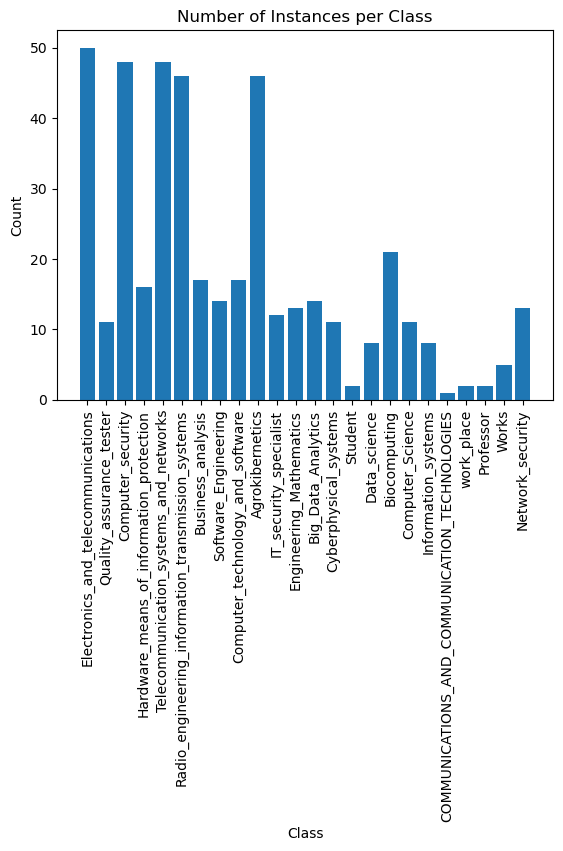

In [4]:
import matplotlib.pyplot as plt
# Get a count of instances for each class
class_count = {}
for instance in onto.individuals():
    if instance.is_a:
        class_name = instance.is_a[0].name
        if class_name in class_count:
            class_count[class_name] += 1
        else:
            class_count[class_name] = 1

# Create a bar chart of class counts
plt.bar(range(len(class_count)), list(class_count.values()), align='center')
plt.xticks(range(len(class_count)), list(class_count.keys()), rotation=90)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Instances per Class')
plt.show()


In [6]:
df = pd.read_csv("my_data.csv")

In [7]:
df.shape

(494, 6)

In [8]:
id_column = range(1, len(df) + 1)

df.insert(0, "id", id_column)

In [9]:
df['id'] = df['id'].astype(int)

In [10]:
df = df.dropna()

In [11]:
df['id'].dtype

dtype('int32')

In [13]:
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [14]:
df.columns = df.columns.str.lower()

In [15]:
df.head()

,id,instance,class,data_property_name,data_property_value,object_property_name,object_property_value
0,1,Farm_management_information_systems,Agrokibernetics,no data,no data,no data,no data
1,2,Transport_Layer_Security,Computer_security,no data,no data,no data,no data
2,3,Agricultural_systems_simulation,Agrokibernetics,no data,no data,no data,no data
3,4,Digital_image_processing,Electronics_and_telecommunications,no data,no data,no data,no data
4,5,User_behavior_analysis,Computer_security,no data,no data,no data,no data


In [16]:
df.shape

(457, 7)

In [17]:
df.to_csv('my_data_db.csv', index=False)

In [1]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.2/1.2 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<a id='send_db'></a>
### Sending a DataFrame to a database

***This code establishes a Dynamic sending of data to PostgreSQL***

In [92]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="dipom",
    user="postgres",
    password="12345",
    port='5432',
)

***This code converts the contents of the pandas DataFrame df object into a data list, where each element of this list is a tuple containing data from the corresponding row (record) of the original DataFrame.***

More details:

***The itertuples() method is used to iterate over DataFrame rows. The parameters index=False, name=None indicate that it is necessary to iterate only by column values and not to include the row index in the iterated values, and also not to use column names in the iterated values.
The list() function is used to convert the iterator object returned by the itertuples() method to a list.
After executing this code, data will be a list of tuples, where each tuple corresponds to one row of DataFrame df. Each tuple will contain the values of all columns of this row in the order specified in the DataFrame. Thus, data can be used to transfer data between different parts of the program, for example, to load data into a database or to transfer data to another program.***

In [93]:
data = list(df.itertuples(index=False, name=None))

***This code creates a cursor cursor to work with the PostgreSQL database associated with the connection connection.
The cursor is an object that allows you to execute SQL queries to the database and get the results of execution. The cursor allows you to make requests for both reading (SELECT) and changing data (INSERT, UPDATE, DELETE).***

In [94]:
cursor = conn.cursor()

***This code creates a new table in the PostgreSQL database associated with the conn connection.
The first row defines the table name as ontology_table.
The second line forms an SQL query to create a new table using f-string string formatting and join() and list comprehension methods.***

**A CREATE TABLE query string is created in this row, followed by the column names and their data type, separated by commas. The column names and their data type are taken from the original DataFrame df. In this case, the data type for all columns is set as varchar(255).**

In [95]:
table_name = 'ontology_table_final'
create_table_query = f"CREATE TABLE {table_name} (id SERIAL PRIMARY KEY, " + ', '.join([f'"{col}" varchar(255)' for col in df.columns[1:]]) + ")"
cursor.execute(create_table_query)
conn.commit()

In [87]:
# table_name = 'ontology_table_final'
# create_table_query = f"CREATE TABLE {table_name} (id INT, " + ', '.join([f'"{col}" varchar(255)' for col in df.columns[1:]]) + ")"
# cursor.execute(create_table_query)
# conn.commit()


***Тhe previously created ontology_table table in the PostgreSQL database.***

**The first row creates a row with column names to insert in the format "col1","col2",...,"coln". The column names are taken from the original DataFrame df and stored in the variable cols.
The second row creates a row to specify the values to be inserted into the table. In this case, we create a string of the VALUES format(value1, value2, ..., valuen), where each value will be substituted into the corresponding column of the table. Instead of the actual values, a placeholder %s is put, which will be replaced with specific values when executing the query.**

In [96]:
cols = ",".join([f'"{i}"' for i in df.columns.tolist()])
vals = "VALUES({})".format(",".join(["%s" for _ in range(len(df.columns))]))
insert_query = "INSERT INTO {} ({}) {}".format(table_name, cols, vals)


In [54]:
cols

'"Instance","Class","Data property name","Data property value","Object property name","Object property value"'

**insert data from the DataFrame into the table**

In [97]:
for row in df.itertuples(index=False, name=None):
    cursor.execute(insert_query, row)

conn.commit()

In [98]:
conn.commit()

***This code closes the connection to the PostgreSQL database in order to free up resources and interrupt communication between the client and the server.***

In [99]:
cursor.close()
conn.close()
